# How to: run functions in the Filter_Function.py file


Edge Statistics can be determined through the use of filters which will modify the frequency


In [66]:
#external packages
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from matplotlib import pyplot as plt

#our package
from rockstar_lifestyle import edges, preprocessing

## Background

Filters are used to find edge statistics by placing a specificly designed filter over a fast fourier transformed (FFT) image. This FFT image (when shifted) has the frequencies of each pixel sorted with all the low frequencies grouped in the center of the image while the high frequencies scattered around the outer sections of the image. By covering specific portions of the image with a mask - we can selectivly choose and exclude groups of frequencies - changing the un-transformed image to highlight certian frequency ranges. 

## Use cases

Depending on the end goal different filters are used. Usually High Pass and Band Pass filters are used to clarify edges of large shapes - although as the shapes decrease in size the Band Pass filter can be used to denote concentrational values. The Low Pass filter works similar to a blur and is better equiped to denote concentration zones.


## Test Image:
We will be using the same test image for all of the filters. This is a color stained protien and cell image with green protiens and blue cells. The image is 512x512.

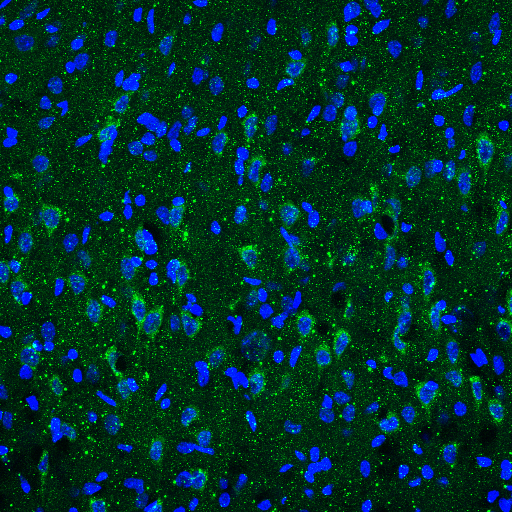

In [67]:
test_image = Image.open('Test_Photo_fromMike.png')
test_image

# High Pass Filter

The high pass filters selectively choose the higher frequnecy images to show in the final image. This is done by applying a masking layer with a center circle of zero values (which blocks out the low frequency images) in an array of ones (allows all other values to be one).

#### Input
* image: a color image which you wish to filter
* radius: the radius of the inner circle of zeros
    * larger numbers are more xxxxx
    * smaller numbers are more xxxxx
* desired_color: the desired color for the filter to be applied to 
    * input must be "r" OR "b" OR "g"

#### Output
* hpf_image: array of high pass filtered image of the desired color


First lets run a test of the high pass filter looking at the green protiens specifically

In [68]:
image = test_image
radius = 80
desired_color = 'g' #only protiens

In [69]:
hpf_image1 = edges.high_pass_filter(image, radius, desired_color)

The high_pass_filter produces the image array so we will need to convert it to view it. Due to the size of the proteins, the HPF doesn't mark the edges of the protiens but help them pop out of the background a little more as the cells/background are mostly low frequency pixels

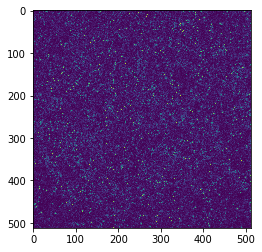

In [70]:
plt.imshow(hpf_image1)

We can also directly compare a High Pass Filtered image directly to the orginal using the HPF_compare function. We will test this one using the a filter on the blue cells

In [71]:
image = test_image
radius = 80
desired_color = 'b' #only protiens

In [72]:
edges.HPF_compare(image, radius, desired_color)

NameError: name 'Filter_Functions' is not defined

# Low Pass Filter

The low pass filter selectively chooses the lower frequency pixels to dominate in the final image. This is done by applying a masking layer with a center circle of ones values (which allows the low frequency pixels to peek through) in an array of zeros (blocks out high frequencys).

#### Input
* image: a color image which you wish to filter
* radius: the radius of the inner circle of ones
    * larger numbers are more xxxxx
    * smaller numbers are more xxxxx
* desired_color: the desired color for the filter to be applied to 
    * input must be "r" OR "b" OR "g"

#### Output
* hpf_image: array of low pass filtered image of the desired color


First we will run a show of the low pass filter using the green protiens

In [73]:
image = test_image
radius = 80
desired_color = 'g' #only protiens

In [74]:
lpf_image = edges.low_pass_filter(image, radius, desired_color)

Again this function results in an array so we need to convert it to show the passed image. The low pass image is useful to look at the concentration zones of the specified color- in this case showing how the protiens have clustered around the edges of the cells

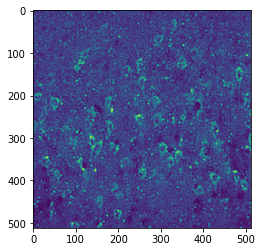

In [75]:
plt.imshow(lpf_image)

We can also directly compare a low pass filtered image directly to the orginal using the LPF_compare function. We will test this one using the a filter on the blue cells.

In [76]:
image = test_image
radius = 80
desired_color = 'b' #only protiens

In [77]:
edges.LPF_compare(image, radius, desired_color)

TypeError: LPF_compare() takes 2 positional arguments but 3 were given